In [3]:
#!pip install isic-cli
#!isic image download images/
import pandas as pd
metadata_df = pd.read_csv("metadata.csv")

/var/folders/0b/33n254b510726mq07nrfcfbw0000gn/T/ipykernel_84428/2168462714.py:2: DtypeWarning: Columns (6,9,10,11,13,14,15,16,17,18,19,22,23,25,26,27,28,30,35) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata_df = pd.read_csv("metadata.csv")


In [4]:
metadata_df.isna().sum()

isic_id                        0
attribution                    0
copyright_license              0
acquisition_day           267523
age_approx                  4863
anatom_site_general        23901
anatom_site_special       500800
benign_malignant           15555
clin_size_long_diam_mm     97261
concomitant_biopsy        362824
dermoscopic_type          476882
diagnosis                 438338
diagnosis_1                 1615
diagnosis_2               436609
diagnosis_3               437130
diagnosis_4               498986
diagnosis_5               502314
diagnosis_confirm_type    377084
family_hx_mm              486139
fitzpatrick_skin_type     498320
image_type                     1
lesion_id                 397423
mel_class                 502588
mel_mitotic_index         503796
mel_thick_mm              503070
mel_type                  503603
mel_ulcer                 503665
melanocytic               442340
nevus_type                502543
patient_id                 48440
personal_h

In [5]:
metadata_df['diagnosis_1'].value_counts()

diagnosis_1
Benign           480700
Malignant         18630
Indeterminate      3010
Name: count, dtype: int64

In [6]:
metadata_df.describe()

,acquisition_day,age_approx,clin_size_long_diam_mm,mel_thick_mm,pixels_x,pixels_y,rcm_case_id
count,236432.000000,499092.000000,406694.000000,885.000000,503955.000000,503955.000000,4.800000e+01
mean,24093.442956,56.193618,3.988203,0.537232,660.735048,495.763267,6.372297e+06
std,12334.265426,15.392529,1.949364,1.362620,1398.428458,939.641152,2.917448e+06
min,0.000000,0.000000,0.800000,0.000000,41.000000,41.000000,2.325483e+06
25%,16323.000000,45.000000,2.850000,0.000000,125.000000,125.000000,4.070884e+06
50%,26321.000000,55.000000,3.390000,0.200000,137.000000,137.000000,6.981190e+06
75%,32568.000000,65.000000,4.410000,0.550000,163.000000,163.000000,9.678431e+06
max,45023.000000,85.000000,100.000000,24.000000,18432.000000,16384.000000,9.678431e+06


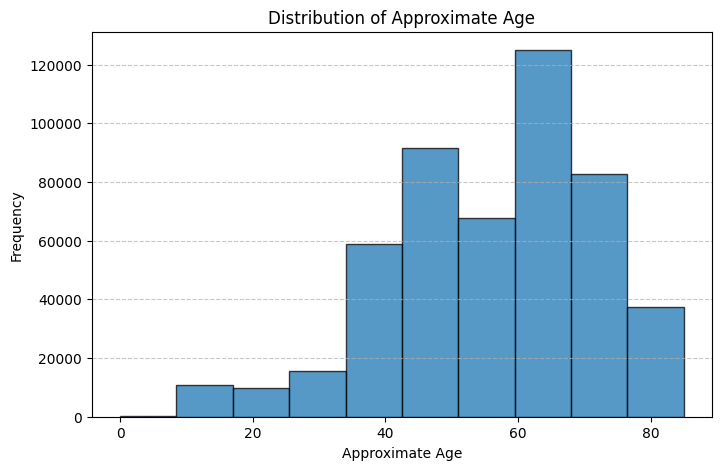

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.hist(metadata_df['age_approx'], edgecolor='black', alpha=0.75)
plt.xlabel("Approximate Age")
plt.ylabel("Frequency")
plt.title("Distribution of Approximate Age")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [8]:
metadata_df['sex'] = metadata_df['sex'].map({'male': 1, 'female': 0})

In [9]:
metadata_df['diagnosis_1'].value_counts()

diagnosis_1
Benign           480700
Malignant         18630
Indeterminate      3010
Name: count, dtype: int64

In [10]:
filter_df = metadata_df.drop(columns=['attribution', 'copyright_license', 'acquisition_day',
                                      'anatom_site_special', 'benign_malignant', 'concomitant_biopsy',
                                      'dermoscopic_type', 'diagnosis', 'diagnosis_2', 'diagnosis_3',
                                      'diagnosis_4', 'diagnosis_5', 'diagnosis_confirm_type', 'mel_class',
                                      'mel_mitotic_index', 'mel_thick_mm', 'mel_type', 'mel_ulcer',
                                      'melanocytic', 'nevus_type', 'rcm_case_id'])


In [11]:
filtered_df2 = filter_df[filter_df['diagnosis_1'] != 'Indeterminate']  # Drop Indeterminate
filtered_df2['diagnosis_1'] = filtered_df2['diagnosis_1'].map({'Malignant': 1, 'Benign': 0})
columns_to_encode = ['anatom_site_general','image_type','tbp_tile_type']

# Apply one-hot encoding
df_encoded = pd.get_dummies(filtered_df2, columns=columns_to_encode, dtype=int)

/var/folders/0b/33n254b510726mq07nrfcfbw0000gn/T/ipykernel_84428/874870015.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df2['diagnosis_1'] = filtered_df2['diagnosis_1'].map({'Malignant': 1, 'Benign': 0})


In [12]:
selected_columns = ['age_approx', 'sex','clin_size_long_diam_mm','anatom_site_general_anterior torso','anatom_site_general_head/neck','anatom_site_general_lateral torso','anatom_site_general_lower extremity','anatom_site_general_oral/genital','anatom_site_general_palms/soles','anatom_site_general_posterior torso','anatom_site_general_upper extremity','diagnosis_1']

correlation_matrix = df_encoded[selected_columns].corr()

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

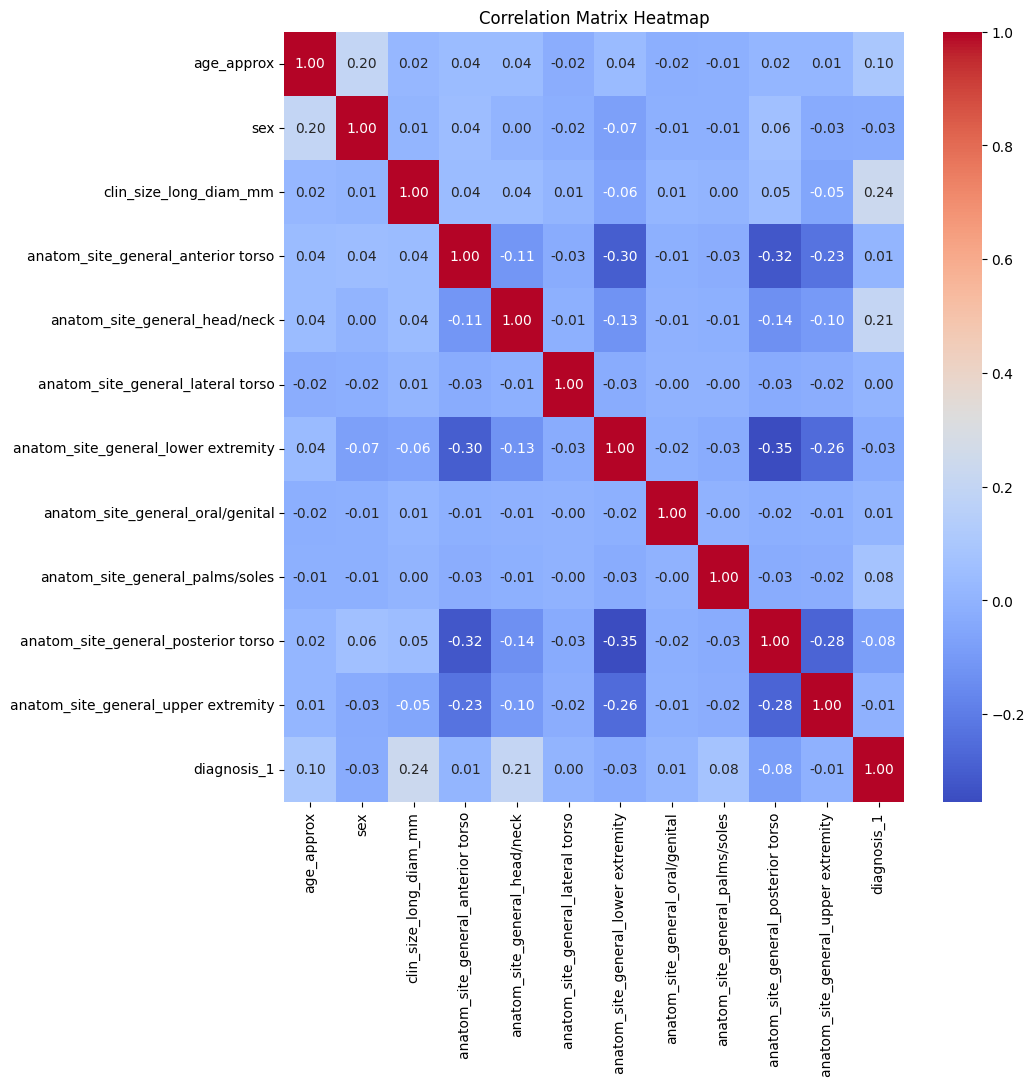

In [13]:
import seaborn as sns
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation Matrix Heatmap")

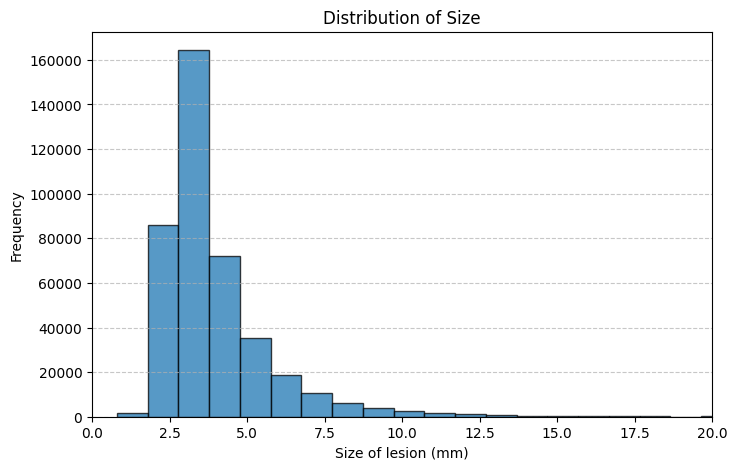

In [14]:
plt.figure(figsize=(8, 5))
plt.hist(metadata_df['clin_size_long_diam_mm'], bins=100,edgecolor='black', alpha=0.75)
plt.xlabel("Size of lesion (mm)")
plt.ylabel("Frequency")
plt.title("Distribution of Size")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlim(0, 20)
plt.show()

/var/folders/0b/33n254b510726mq07nrfcfbw0000gn/T/ipykernel_84428/2185326476.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


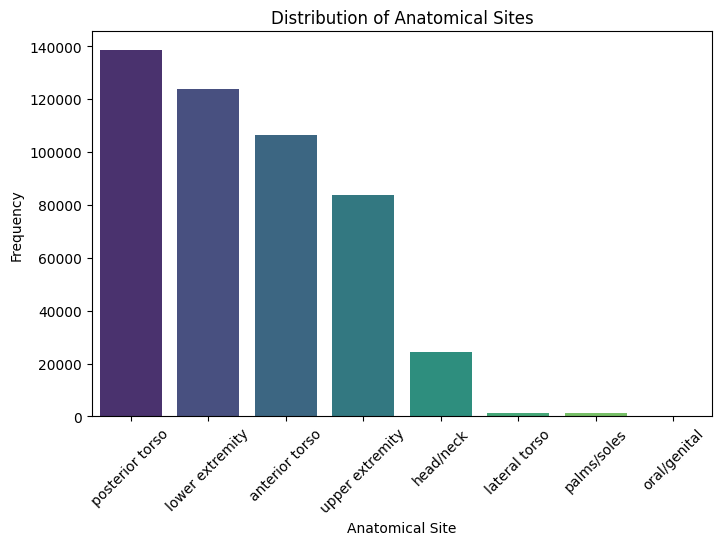

In [15]:
category_counts = metadata_df['anatom_site_general'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")

plt.xlabel("Anatomical Site")
plt.ylabel("Frequency")
plt.title("Distribution of Anatomical Sites")

plt.xticks(rotation=45)

plt.show()

/var/folders/0b/33n254b510726mq07nrfcfbw0000gn/T/ipykernel_84428/3010833806.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


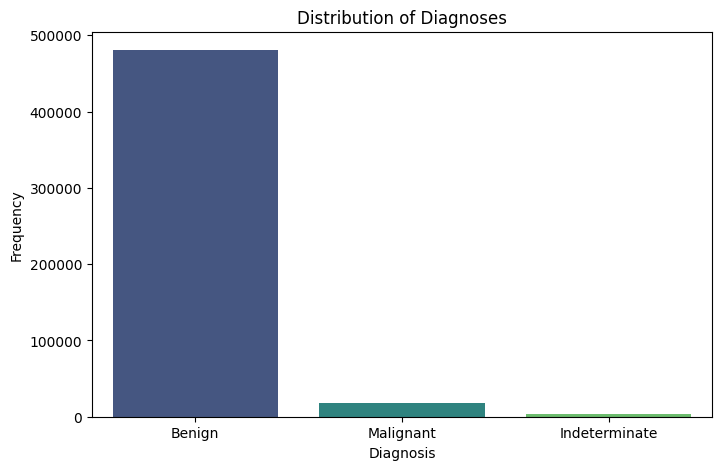

In [16]:
category_counts = metadata_df['diagnosis_1'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")

plt.xlabel("Diagnosis")
plt.ylabel("Frequency")
plt.title("Distribution of Diagnoses")

plt.show()

In [17]:
filtered_df2.head()

,isic_id,age_approx,anatom_site_general,clin_size_long_diam_mm,diagnosis_1,family_hx_mm,fitzpatrick_skin_type,image_type,lesion_id,patient_id,personal_hx_mm,pixels_x,pixels_y,sex,tbp_tile_type
0,ISIC_9536278,45.0,lower extremity,NaN,1.0,NaN,NaN,dermoscopic,NaN,NaN,NaN,600,450,0.0,NaN
1,ISIC_7650956,65.0,upper extremity,NaN,1.0,NaN,NaN,dermoscopic,NaN,NaN,NaN,600,450,0.0,NaN
2,ISIC_5730927,85.0,lower extremity,NaN,1.0,NaN,NaN,dermoscopic,NaN,NaN,NaN,600,450,1.0,NaN
3,ISIC_4305055,85.0,lower extremity,NaN,1.0,NaN,NaN,dermoscopic,NaN,NaN,NaN,600,450,0.0,NaN
4,ISIC_5681611,85.0,lower extremity,NaN,1.0,NaN,NaN,dermoscopic,NaN,NaN,NaN,600,450,0.0,NaN


In [18]:
filtered_df3 = filtered_df2.drop(columns=['family_hx_mm','fitzpatrick_skin_type','personal_hx_mm','tbp_tile_type'])

In [19]:
filtered_df3.head()

,isic_id,age_approx,anatom_site_general,clin_size_long_diam_mm,diagnosis_1,image_type,lesion_id,patient_id,pixels_x,pixels_y,sex
0,ISIC_9536278,45.0,lower extremity,NaN,1.0,dermoscopic,NaN,NaN,600,450,0.0
1,ISIC_7650956,65.0,upper extremity,NaN,1.0,dermoscopic,NaN,NaN,600,450,0.0
2,ISIC_5730927,85.0,lower extremity,NaN,1.0,dermoscopic,NaN,NaN,600,450,1.0
3,ISIC_4305055,85.0,lower extremity,NaN,1.0,dermoscopic,NaN,NaN,600,450,0.0
4,ISIC_5681611,85.0,lower extremity,NaN,1.0,dermoscopic,NaN,NaN,600,450,0.0


In [21]:
import os
import cv2
import numpy as np
image_folder = "images"
def load_and_flatten_image(image_id, folder):
    image_path = os.path.join(folder, f"{image_id}.jpg")
    
    # Check if file exists
    if not os.path.exists(image_path):
        return None  # Handle missing images
    
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
    if img is None:
        return None

    img = cv2.resize(img, (128, 128))  # Resize to 128x128
    
    # Flatten image into a 1D array
    return img.flatten()


In [22]:
filtered_df3["image_data"] = filtered_df3["isic_id"].apply(lambda x: load_and_flatten_image(x, image_folder)) # add flattened data to dataframe

In [26]:
filtered_df3.to_csv("isic_data_w_images.csv", index=False)

In [29]:
# X and Y numerical data for network
X = filtered_df3.drop(columns=['diagnosis_1','isic_id','lesion_id','patient_id'])
# encode categorical data
X = pd.get_dummies(X, columns=["anatom_site_general", "image_type"], dtype=int)
Y = filtered_df3['diagnosis_1']

In [32]:
import os
script_path = os.path.abspath("your_notebook.ipynb")
print("Notebook Path:", script_path)

Notebook Path: /Users/jonahlevine/Deep_learning_project/your_notebook.ipynb
